<a href="https://colab.research.google.com/github/LuaraMarino/Trabalhinhos/blob/main/CyberSecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vocês serão desafiados a “desenvolver uma ferramenta para identificar oportunidades na melhoria da gestão de fretes nas operações de distribuição” para a BASF. Dessa forma, considerando o escopo das aulas de Congnitive CyberSecurity, implementaremos na prática um mecanismo de IA para evitar fraudes.
Imagine que um cliente faça uma compra de um item como, por exemplo, computador ou celular. O item é devidamente entregue, mas o usuário afirma que não. Como podemos garantir a entrega do produto?
Vocês deverão utilizar Optical Character Recognition (OCR) para garantir que a assinatura feita durante a entrega de um determinado produto é semelhante à assinatura de um documento pessoal do mesmo cliente.

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (29.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5

In [ ]:
import os
import pytesseract
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random
try:
  from PIL import Image, ImageChops
except ImportError:
  import Image
from google.colab import files
from google.colab.patches import cv2_imshow
import zipfile

In [ ]:
as1 = cv2.imread('assinatura1.jpg')
as2 = cv2.imread('assinatura1 - Copia.jpg')

In [ ]:
np.shape(as1)[0], np.shape(as1)[1]

(324, 725)

In [ ]:
np.shape(as2)[0], np.shape(as2)[1]

(324, 725)

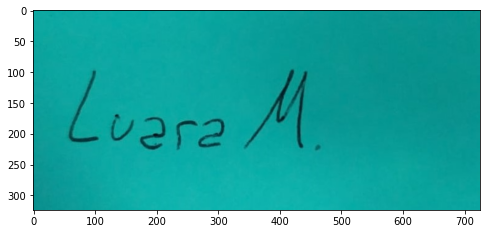

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.imshow(as1)

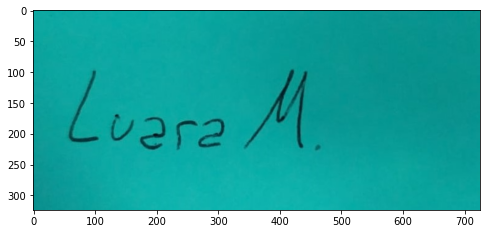

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.imshow(as2)

In [ ]:
print(as1)

[[[ 14 169 162]
  [ 13 168 161]
  [ 13 168 161]
  ...
  [  9 149 142]
  [  9 149 142]
  [  9 149 142]]

 [[ 14 169 162]
  [ 14 169 162]
  [ 13 168 161]
  ...
  [  9 149 142]
  [  9 149 142]
  [  9 149 142]]

 [[ 14 169 162]
  [ 14 169 162]
  [ 13 168 161]
  ...
  [  9 149 142]
  [  9 149 142]
  [  9 149 142]]

 ...

 [[  7 143 141]
  [  8 144 142]
  [  8 144 142]
  ...
  [ 11 165 160]
  [ 10 164 159]
  [ 10 164 159]]

 [[  7 143 141]
  [  8 144 142]
  [  8 144 142]
  ...
  [ 11 165 160]
  [ 10 164 159]
  [ 10 164 159]]

 [[  8 144 142]
  [  8 144 142]
  [  8 144 142]
  ...
  [ 11 165 160]
  [ 10 164 159]
  [ 10 164 159]]]


In [ ]:
print(as2)

[[[ 14 169 162]
  [ 13 168 161]
  [ 13 168 161]
  ...
  [  9 149 142]
  [  9 149 142]
  [  9 149 142]]

 [[ 14 169 162]
  [ 14 169 162]
  [ 13 168 161]
  ...
  [  9 149 142]
  [  9 149 142]
  [  9 149 142]]

 [[ 14 169 162]
  [ 14 169 162]
  [ 13 168 161]
  ...
  [  9 149 142]
  [  9 149 142]
  [  9 149 142]]

 ...

 [[  7 143 141]
  [  8 144 142]
  [  8 144 142]
  ...
  [ 11 165 160]
  [ 10 164 159]
  [ 10 164 159]]

 [[  7 143 141]
  [  8 144 142]
  [  8 144 142]
  ...
  [ 11 165 160]
  [ 10 164 159]
  [ 10 164 159]]

 [[  8 144 142]
  [  8 144 142]
  [  8 144 142]
  ...
  [ 11 165 160]
  [ 10 164 159]
  [ 10 164 159]]]


In [ ]:
as1 = cv2.cvtColor(as1, cv2.COLOR_BGR2GRAY)
as2 = cv2.cvtColor(as2, cv2.COLOR_BGR2GRAY)

In [ ]:
def appSegmentation(listImg):
    img_sobel = []
    img_canny = []
    img_thresh = []
    
           
    # Thresholding
    (T, thresh) = cv2.threshold(listImg, 80, 255, cv2.THRESH_BINARY)
    img_thresh.append(thresh)
    
    # Sobel
    sobelX = cv2.Sobel(listImg, cv2.CV_64F, 1, 0)
    sobelY = cv2.Sobel(listImg, cv2.CV_64F, 0, 1)
    sobelX = np.uint8(np.absolute(sobelX))
    sobelY = np.uint8(np.absolute(sobelY))
    sobel = cv2.bitwise_or(sobelX, sobelY)
    img_sobel.append(sobel)
    
    # Canny
    canny1 = cv2.Canny(listImg, 70, 100)
    canny2 = cv2.Canny(listImg, 70, 100)
    canny = cv2.bitwise_or(canny1, canny2)
    img_canny.append(canny)
           
    return img_sobel, img_canny, img_thresh

In [ ]:
as1_sobel, as1_canny, as1_thresh = appSegmentation(as1)

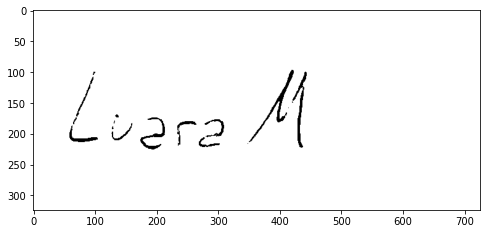

In [ ]:
fig = plt.figure(figsize = (8, 8))
plt.imshow(as1_thresh[0], "gray")

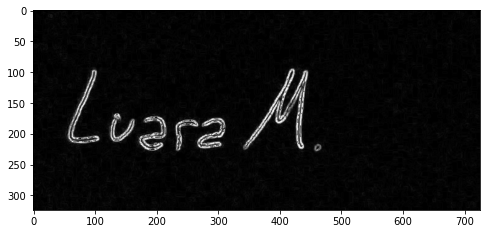

In [ ]:
fig = plt.figure(figsize = (8, 8))
plt.imshow(as1_sobel[0], "gray")

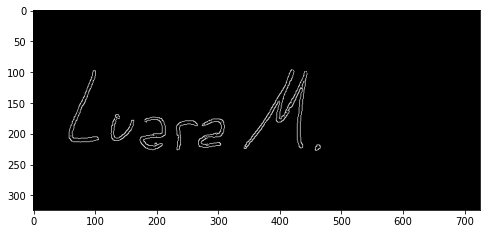

In [ ]:
fig = plt.figure(figsize = (8, 8))
plt.imshow(as1_canny[0], "gray")

In [ ]:
as2_sobel, as2_canny, as2_thresh = appSegmentation(as2)

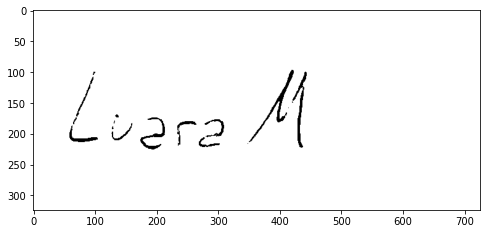

In [ ]:
fig = plt.figure(figsize = (8, 8))
plt.imshow(as2_thresh[0], "gray")

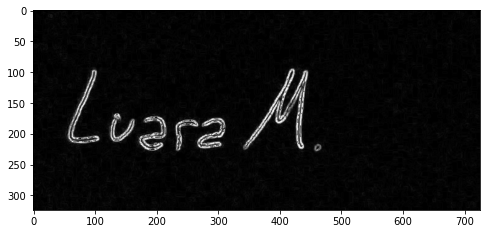

In [ ]:
fig = plt.figure(figsize = (8, 8))
plt.imshow(as2_sobel[0], "gray")

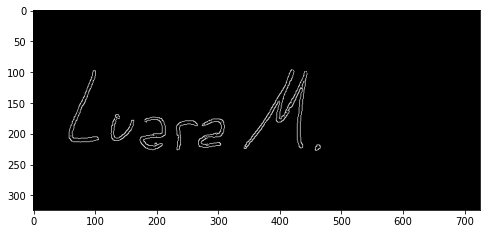

In [ ]:
fig = plt.figure(figsize = (8, 8))
plt.imshow(as2_canny[0], "gray")

In [ ]:
image_path_in_colab='assinatura1.jpg'
extractedInformation1 = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation1)

Lvara M



In [ ]:
image_path_in_colab='assinatura1 - Copia.jpg'
extractedInformation2 = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation2)

Lvara M



In [ ]:
if extractedInformation1 == extractedInformation2:
  print("Assinatura confirma")
else:
  print("Assinatura não confere")

Assinatura confirma
